#HW2 - Algorithm Implementation and Basic Model Selection





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import pylab
params = {
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.labelsize': 20,
    'axes.titlesize': 22,
    'legend.fontsize': 18,
    'legend.title_fontsize': 22,
    'figure.titlesize': 24
}
pylab.rcParams.update(params)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Loading the prepared datasets
#X_test = pd.read_csv('/content/drive/MyDrive/לימודים/סמסטר ו/מערכות לומדות/שיעורי בית/Major2/test_df_prepared.csv')
#X_train = pd.read_csv('/content/drive/MyDrive/לימודים/סמסטר ו/מערכות לומדות/שיעורי בית/Major2/train_df_prepared.csv')
#y_test = pd.read_csv('/content/drive/MyDrive/לימודים/סמסטר ו/מערכות לומדות/שיעורי בית/Major2/y_test_final.csv')
#y_train = pd.read_csv('/content/drive/MyDrive/לימודים/סמסטר ו/מערכות לומדות/שיעורי בית/Major2/y_train_final.csv')

X_test = pd.read_csv('test_df_prepared.csv')
X_train = pd.read_csv('train_df_prepared.csv')
y_test = pd.read_csv('y_test_final.csv')
y_train = pd.read_csv('y_train_final.csv')

## Part 1: Basic model selection with k-Nearest Neighbors


In [ ]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


In [ ]:
# temporary DataFrame containing only PCR_04 and PCR_09 to predict spread
X_train_temp =  np.copy(X_train[['PCR_04', 'PCR_09']])
X_test_temp = np.copy(X_test[['PCR_04', 'PCR_09']])
y_train_temp =  np.copy(y_train[['spread']])
y_train_temp = y_train_temp.ravel()
y_test_temp = np.copy(y_test[['spread']])

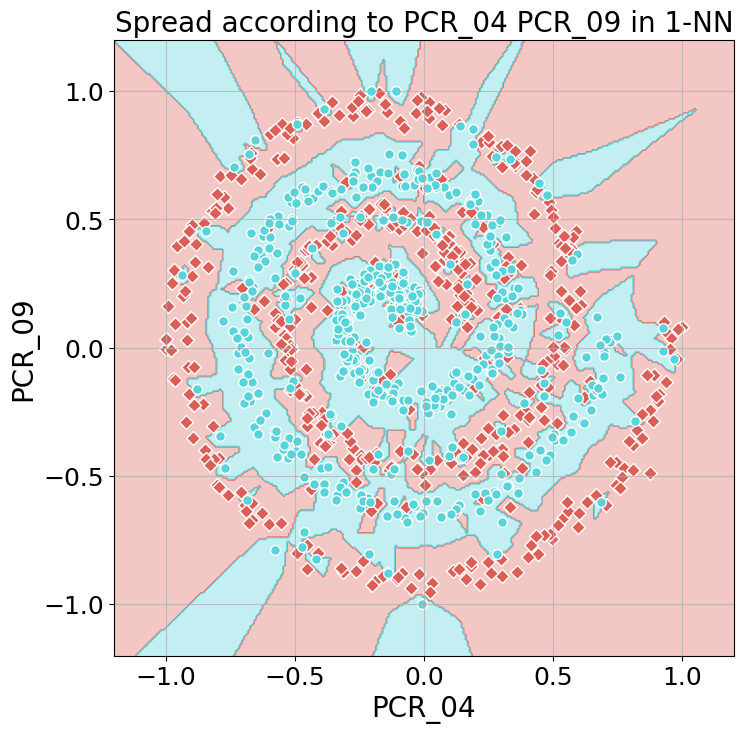

In [ ]:
# Q1 : Train a k-NN model using k=1 on your training set and use the visualize_clf method to visualize the resulted decision regions (with appropriate title and labels).
from sklearn.neighbors import KNeighborsClassifier
one_NN = KNeighborsClassifier(n_neighbors=1)
one_NN.fit(X_train_temp, y_train_temp)
visualize_clf(one_NN, X_train_temp, y_train_temp, 'Spread according to PCR_04 PCR_09 in 1-NN', 'PCR_04', 'PCR_09')

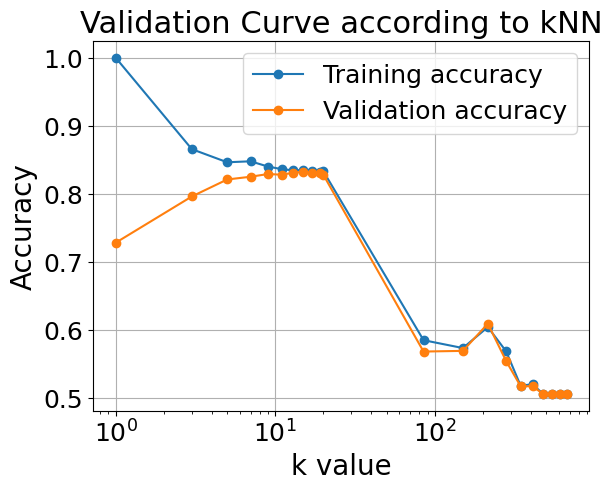

In [ ]:
# Q2 : find the best k value in list(range(1, 20, 2)) + list(range(20, 695, 65)) for predicting
# spread using PCR_04 and PCR_09

from sklearn.model_selection import cross_validate
knn_values = list(range(1, 20, 2)) + list(range(20, 695, 65))
train_scores = []
val_scores = []

for k in knn_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn, X_train_temp, y_train_temp, cv=8, return_train_score=True) # scoring='accuracy' this is the default.
    # cv_results['train_score'] contains the mean accuracy on the training sets (k-1 folds)
    # cv_results['test_score'] contains the mean accuracy on the validation sets (1 fold)
    train_scores.append(np.mean(cv_results['train_score']))
    val_scores.append(np.mean(cv_results['test_score']))


# plot the validation curve
plt.figure()
plt.semilogx(knn_values, train_scores, label='Training accuracy', marker='o')
plt.semilogx(knn_values, val_scores, label='Validation accuracy', marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Validation Curve according to kNN')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# best behaviur is at k = 15 , which is the 7th index (counting from 0)
print("Best k value:")
print(knn_values[7])
print("\nTraining accuracy:")
print(train_scores[7])
print("\nValidation accuracy:")
print(val_scores[7])

Best k value:
15

Training accuracy:
0.8347142857142857

Validation accuracy:
0.8320000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


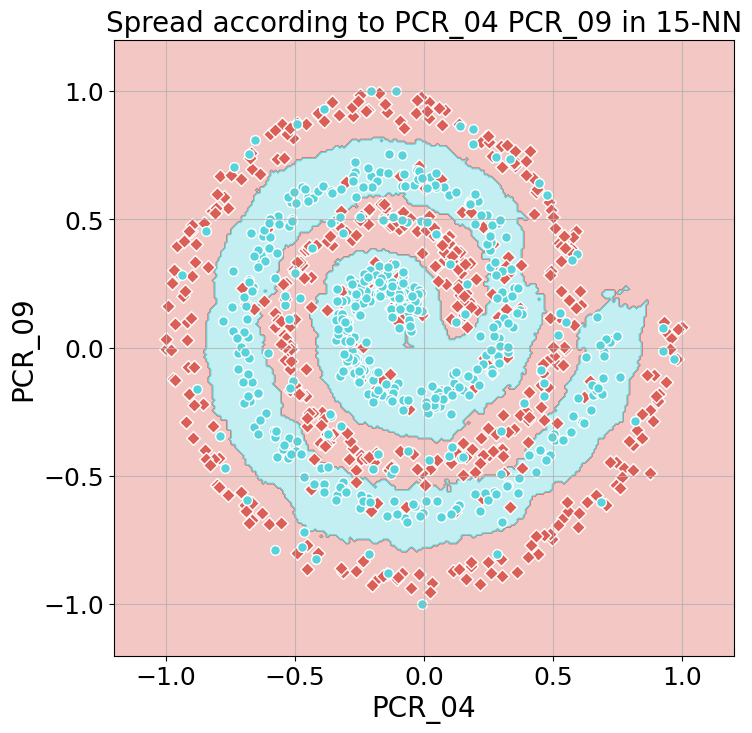

Trian accuracy: 0.8350
Test accuracy: 0.8400


In [ ]:
# Q3: training 15-NN model using train set and testing on test set
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train_temp, y_train_temp)
prediction = knn_15.predict(X_test_temp)

# ploting the results :
visualize_clf(knn_15, X_train_temp, y_train_temp, 'Spread according to PCR_04 PCR_09 in 15-NN', 'PCR_04', 'PCR_09')

# evaluating accurecy
train_score = knn_15.score(X_train_temp,y_train_temp)
print(f"Trian accuracy: {train_score:.4f}")
test_score = knn_15.score(X_test_temp,y_test_temp)
print(f"Test accuracy: {test_score:.4f}")

## Part 2: Decision trees

In [ ]:
# temporary DataFrame containing only risk, PCR_03 and PCR_10 and SpecialProperty : {O+, B+} = True, {O-, A-, A+, B-, AB+, AB-} = False
X_train_temp =  np.copy(X_train[['PCR_03', 'PCR_10', 'SpecialProperty']])
X_test_temp = np.copy(X_test[['PCR_03', 'PCR_10', 'SpecialProperty']])
y_train_temp =  np.copy(y_train[['risk']])
#y_train_temp = y_train_temp.ravel()
y_test_temp = np.copy(y_test[['risk']])

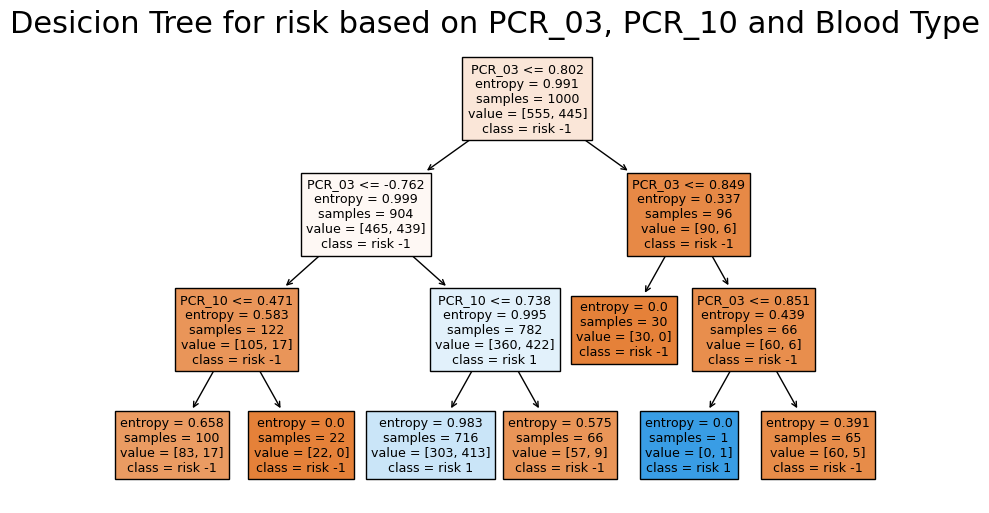

Train accuracy: 0.6660


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
clt.fit(X_train_temp, y_train_temp)
plt.figure(figsize=(10,6))
plot_tree(clt, filled=True, feature_names=['PCR_03', 'PCR_10', 'SpecialProperty'], class_names=['risk -1', 'risk 1'])
# left arrow - True , right arrow - False
plt.title('Desicion Tree for risk based on PCR_03, PCR_10 and Blood Type')
plt.show()

# training accuracy
train_score = clt.score(X_train_temp,y_train_temp)
print(f"Train accuracy: {train_score:.4f}")

Best parameters found: {'max_depth': 7, 'min_samples_leaf': 0.05}
Best score: 0.663


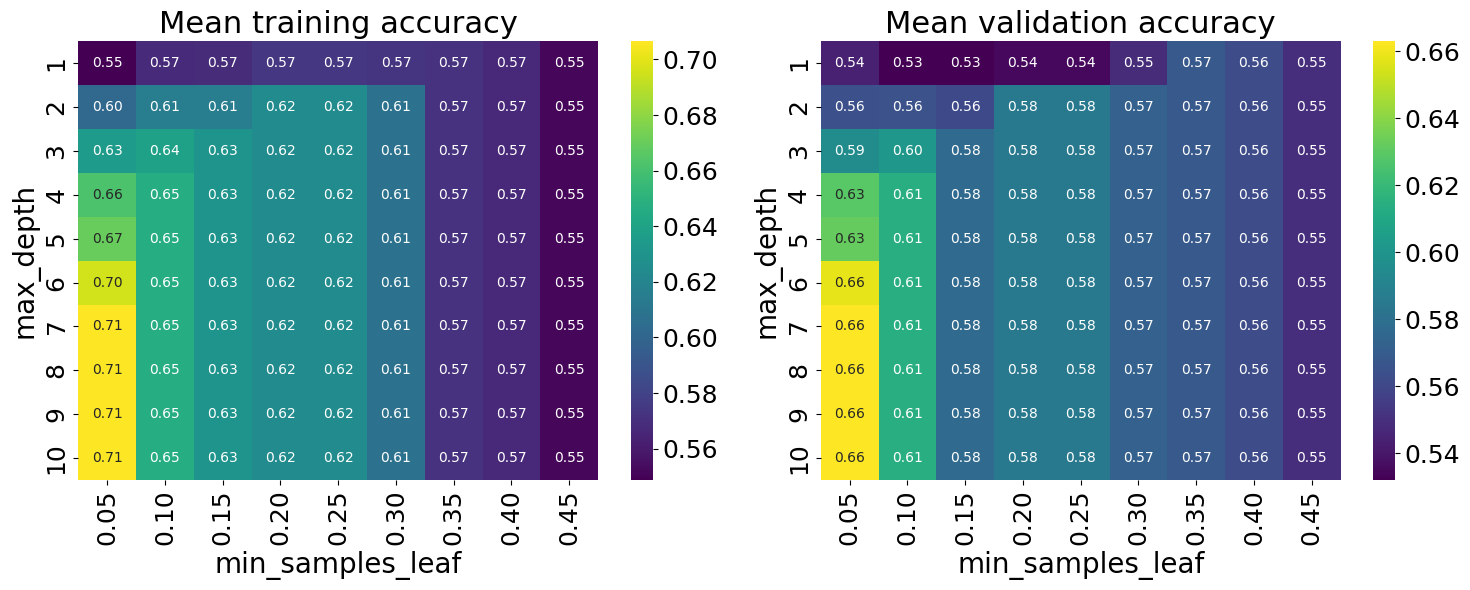

In [ ]:
# Q6.a and Q6.b : finding the optimal id3 based on min_samples_leaf and max_depth
from sklearn.model_selection import GridSearchCV
import seaborn as sns
parameters = {'min_samples_leaf' :(np.linspace(0.05, 0.45, num=9)), 'max_depth': list(range(1, 11, 1))}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), param_grid=parameters, cv=5, return_train_score=True)
grid_search.fit(X_train_temp, y_train_temp)

results = grid_search.cv_results_
mean_train_scores = results['mean_train_score'].reshape(len(parameters['max_depth']), len(parameters['min_samples_leaf']))
mean_test_scores = results['mean_test_score'].reshape(len(parameters['max_depth']), len(parameters['min_samples_leaf']))

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# plot the grid search
# create a DataFrame for seaborn heatmap
train_scores_df = pd.DataFrame(mean_train_scores, index=parameters['max_depth'], columns=parameters['min_samples_leaf'])
test_scores_df = pd.DataFrame(mean_test_scores, index=parameters['max_depth'], columns=parameters['min_samples_leaf'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(train_scores_df, annot=True, fmt=".2f", cmap='viridis', ax=axes[0], xticklabels=[f'{col:.2f}' for col in parameters['min_samples_leaf']])
axes[0].set_title('Mean training accuracy')
axes[0].set_xlabel('min_samples_leaf')
axes[0].set_ylabel('max_depth')

sns.heatmap(test_scores_df, annot=True, fmt=".2f", cmap='viridis', ax=axes[1], xticklabels=[f'{col:.2f}' for col in parameters['min_samples_leaf']])
axes[1].set_title('Mean validation accuracy')
axes[1].set_xlabel('min_samples_leaf')
axes[1].set_ylabel('max_depth')

plt.tight_layout()
plt.show()


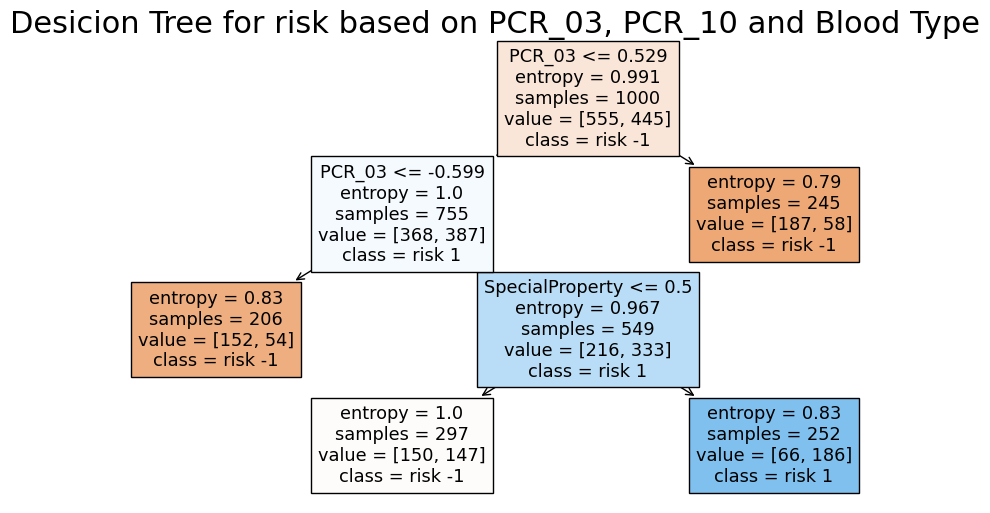

Train accuracy: 0.6750
Test accuracy: 0.6640


In [ ]:
# Q8: retraining a desicion tree with {'max_depth': 4, 'min_samples_leaf': 0.20}
clt = DecisionTreeClassifier(max_depth=4, criterion='entropy', min_samples_leaf=0.2)
clt.fit(X_train_temp, y_train_temp)
prediction= clt.predict(X_test_temp)
plt.figure(figsize=(12,6))
plot_tree(clt, filled=True, feature_names=['PCR_03', 'PCR_10', 'SpecialProperty'], class_names=['risk -1', 'risk 1'])
# left arrow - True , right arrow - False
plt.title('Desicion Tree for risk based on PCR_03, PCR_10 and Blood Type')
plt.show()

# training accuracy
train_score = clt.score(X_train_temp,y_train_temp)
print(f"Train accuracy: {train_score:.4f}")
test_score = clt.score(X_test_temp,y_test_temp)
print(f"Test accuracy: {test_score:.4f}")

## Part 3: Linear SVM and the Polynomial kernel

In [ ]:
# SoftSVM module :
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        # margins are reshaped to have one column: array of shape (n_samples, 1)
        margins = (X.dot(w) + b).reshape(-1, 1)
        # element-wise multiplication:
        # each element in hinge_inputs is the product of the corresponding elements from margins and y
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        loss = 0.0
        # element-wise maximum
        max = np.maximum(0, 1 - hinge_inputs)
        loss = float(norm ** 2 + C * np.sum(max))
        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        g_w = None
        g_b = 0.0
        # given sign function
        def f(z):
            return np.where(z < 1 , -1 , 0 )

        # margins are reshaped to have one column: array of shape (n_samples, 1)
        margins = (X.dot(w) + b).reshape(-1, 1)
        # element-wise multiplication:
        # each element in hinge_inputs is the product of the corresponding elements from margins and y
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        f_hinge_inputs = f(hinge_inputs)
        # element-wise multiplication for g_w:
        mul_f_yi = np.multiply(f_hinge_inputs, y.reshape(-1, 1))
        mul_f_yi_xi =  np.multiply(X, mul_f_yi.reshape(-1,1))
        g_w = 2*w + C * np.sum(mul_f_yi_xi, axis=0)
        # element-wise multiplication for g_b:
        g_b = C * np.sum(mul_f_yi)

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)


            # TODO: update the learned parameters
            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = None

        #wTx+b:
        margin = X.dot(self.w) + self.b
        y_pred = np.sign(margin)

        return y_pred


In [ ]:
# given code to verify gradients
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


In [ ]:
# temporary DataFrame containing only PCR_04 and PCR_09 to predict spread
X_train_temp =  np.copy(X_train[['PCR_04', 'PCR_09']])
X_test_temp = np.copy(X_test[['PCR_04', 'PCR_09']])
y_train_temp =  np.copy(y_train[['spread']])
y_test_temp = np.copy(y_test[['spread']])

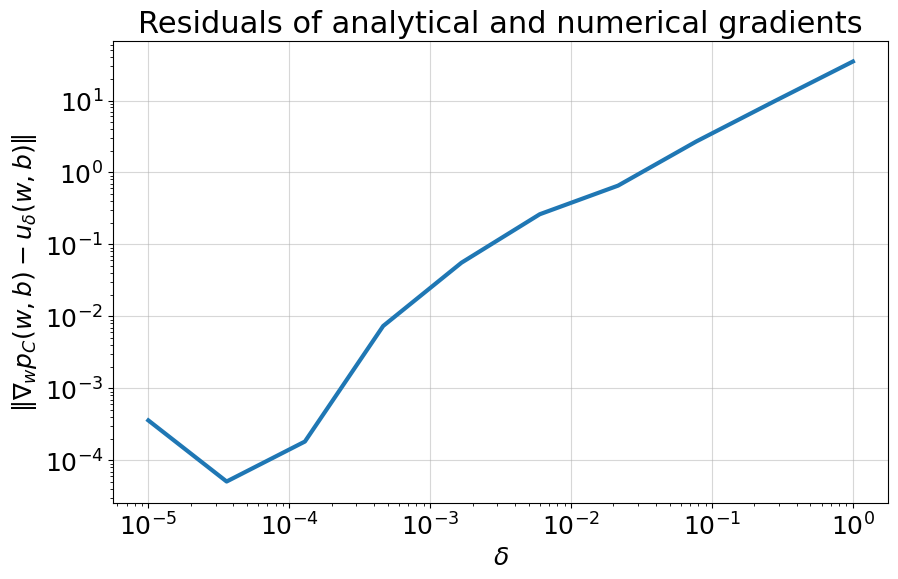

In [ ]:
# generate a plot that compares the numerical gradients to the analytic gradient
compare_gradients(X_train_temp, y_train_temp, deltas=np.logspace(-5,0,10))

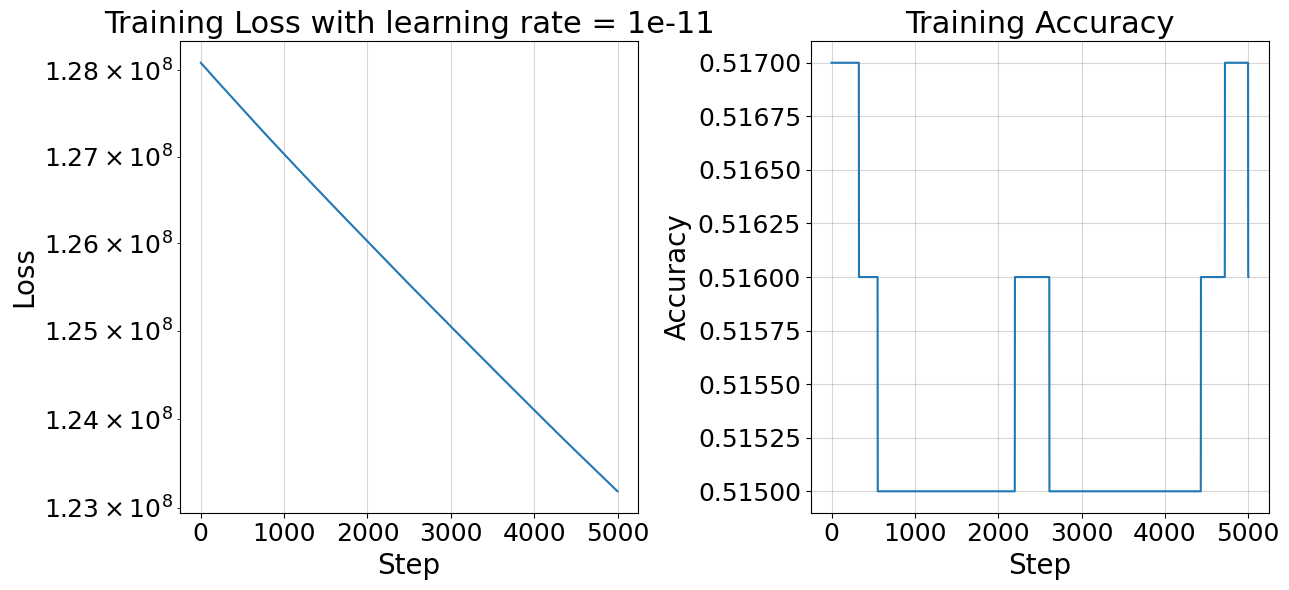

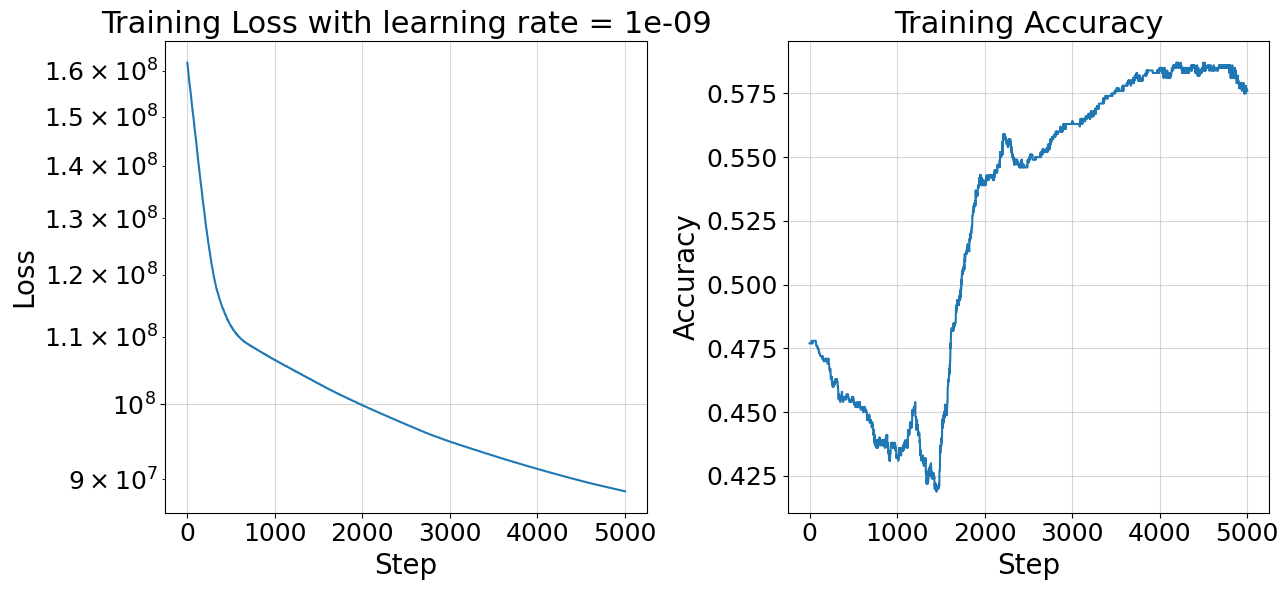

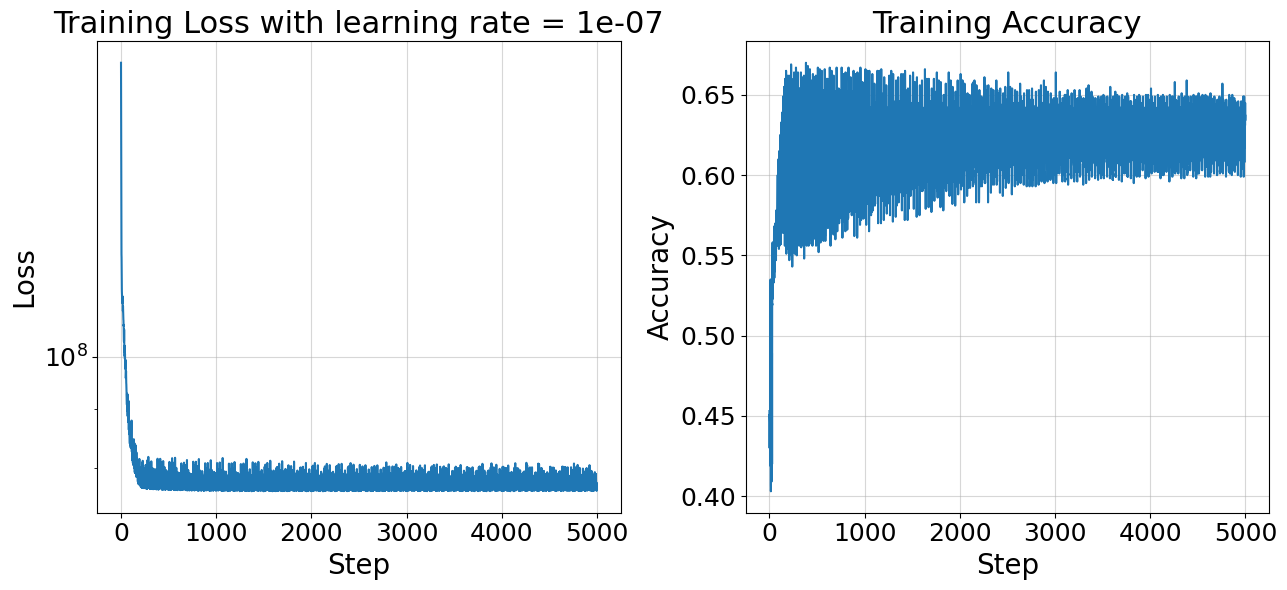

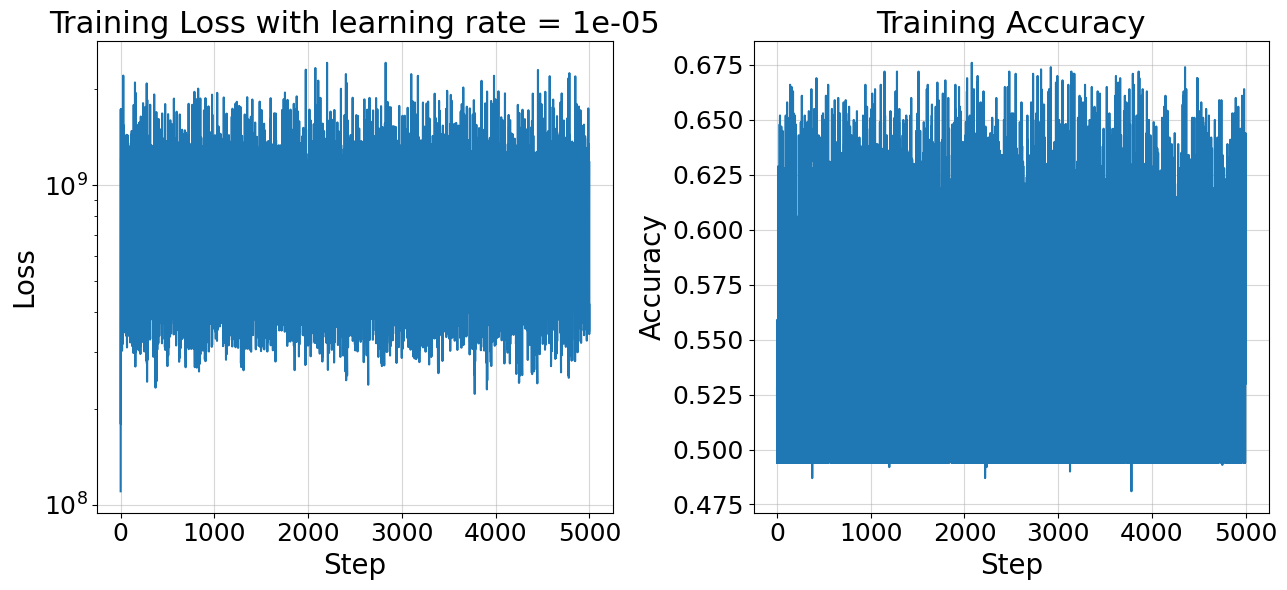

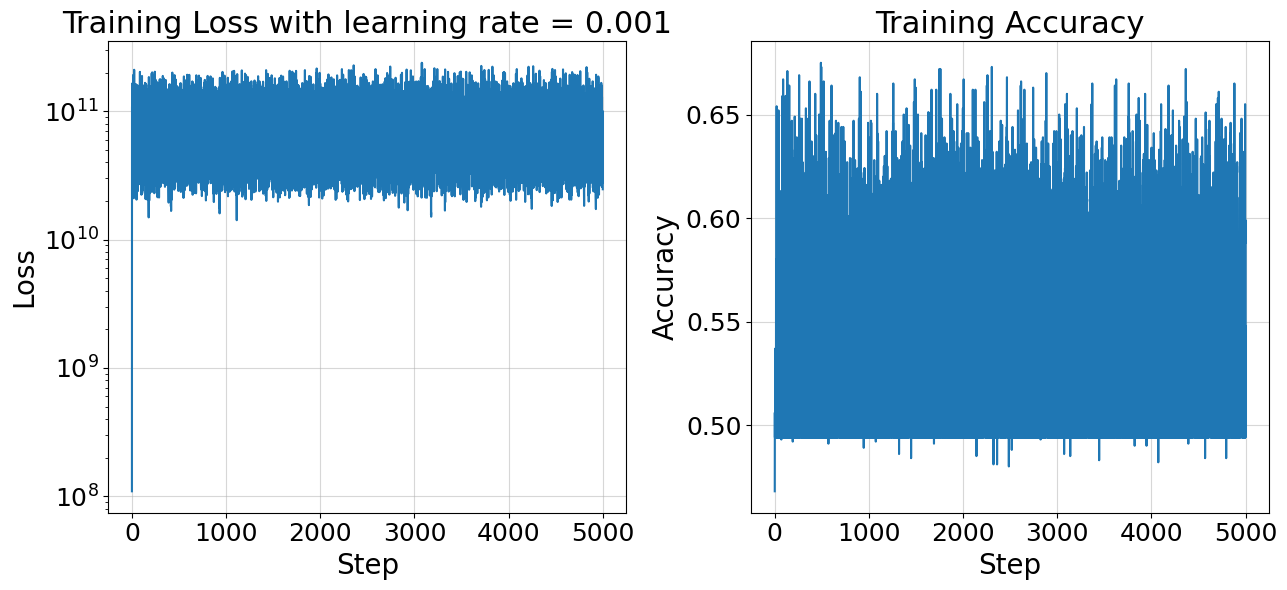

In [ ]:
# Q11 : effect of the learning rate (step size) to make sure that our models converge

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
lr_values = np.logspace(-11, -3, 5)
for lr in lr_values:
    C=1e5
    clf = SoftSVM(C=C, lr=lr)
    X_train_poly = PolynomialFeatures(degree=3,).fit_transform(X_train_temp)
    X_train_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train_poly)
    losses, accuracies = clf.fit_with_logs(X_train_poly, y_train_temp, max_iter=5000)
    plt.figure(figsize=(13, 6))
    plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Training Loss with learning rate = {}".format(lr))
    plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
    plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Training Accuracy")
    plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()


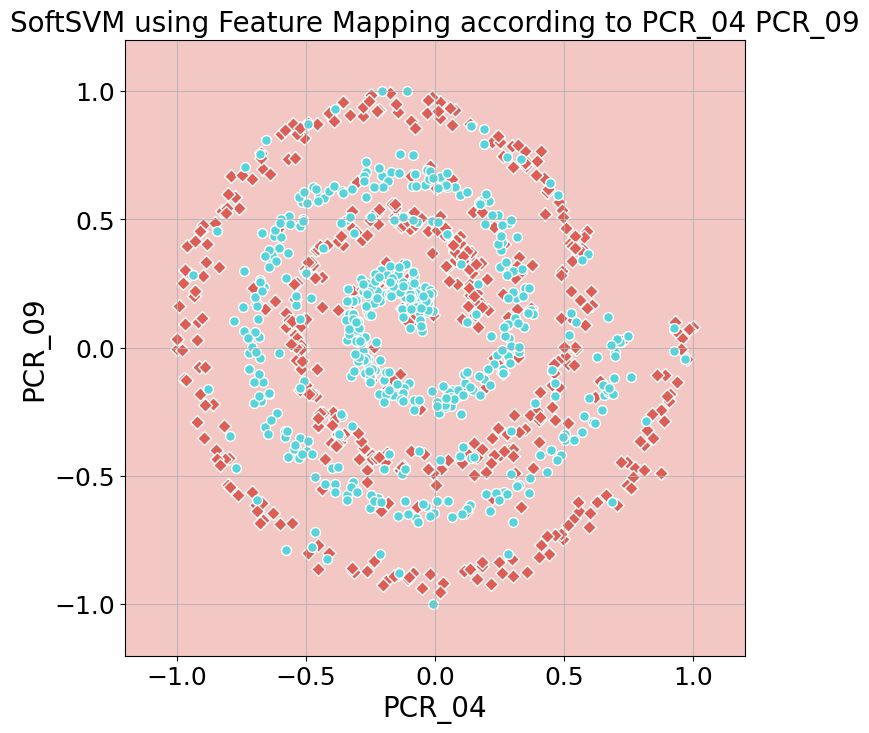

Train accuracy: 0.4940
Test accuracy: 0.5240


In [ ]:
#Q12:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)), ('scaler', MinMaxScaler()), ('SVM', SoftSVM(C=1e5, lr=1e-05))])
svm_clf.fit(X_train_temp, y_train_temp)
visualize_clf(svm_clf, X_train_temp, y_train_temp, "SoftSVM using Feature Mapping according to PCR_04 PCR_09", "PCR_04", "PCR_09")
prediction = svm_clf.predict(X_test_temp)

# training and test accuracy
train_score = svm_clf.score(X_train_temp,y_train_temp)
print(f"Train accuracy: {train_score:.4f}")
test_score = svm_clf.score(X_test_temp,y_test_temp)
print(f"Test accuracy: {test_score:.4f}")

## Part 4: The RBF kernel

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


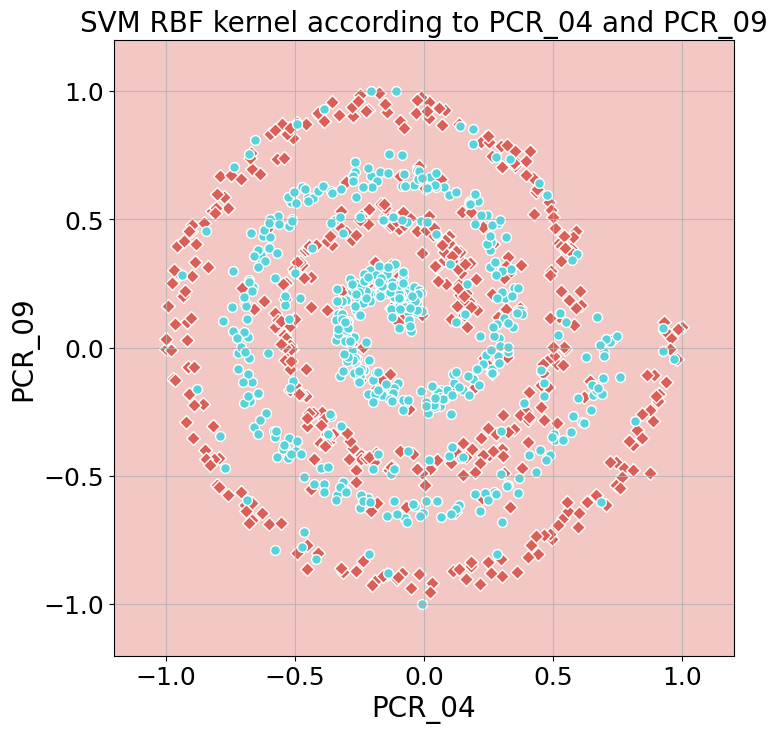

Train accuracy: 0.5060
Test accuracy: 0.4760


In [ ]:
# Q14 : applying dual SVM RBF
from sklearn.svm import SVC
dualSVM = SVC(gamma = 1e-7, C=1, kernel='rbf')
dualSVM.fit(X_train_temp, y_train_temp)
visualize_clf(dualSVM, X_train_temp, y_train_temp, "SVM RBF kernel according to PCR_04 and PCR_09", "PCR_04", "PCR_09")

# training and test accuracy
train_score = dualSVM.score(X_train_temp,y_train_temp)
print(f"Train accuracy: {train_score:.4f}")
test_score = dualSVM.score(X_test_temp,y_test_temp)
print(f"Test accuracy: {test_score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


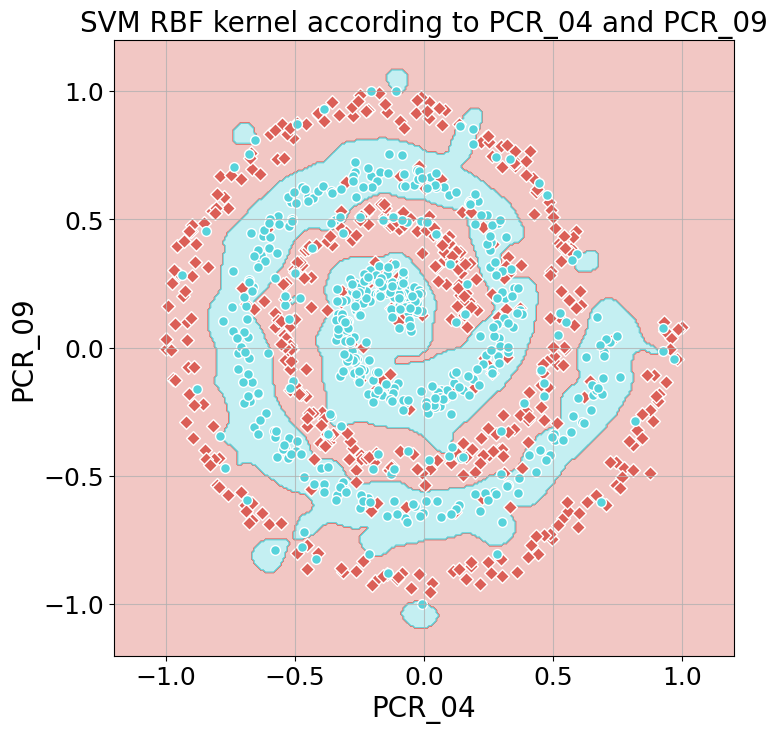

Train accuracy: 0.8580
Test accuracy: 0.8240


In [ ]:
# Q15 : applying dual SVM with RBF kernel with other parameters

dualSVM_ = SVC(gamma = 200, C=1, kernel='rbf')
dualSVM_.fit(X_train_temp, y_train_temp)
visualize_clf(dualSVM_, X_train_temp, y_train_temp, "SVM RBF kernel according to PCR_04 and PCR_09", "PCR_04", "PCR_09")

# training and test accuracy
train_score = dualSVM_.score(X_train_temp,y_train_temp)
print(f"Train accuracy: {train_score:.4f}")
test_score = dualSVM_.score(X_test_temp,y_test_temp)
print(f"Test accuracy: {test_score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


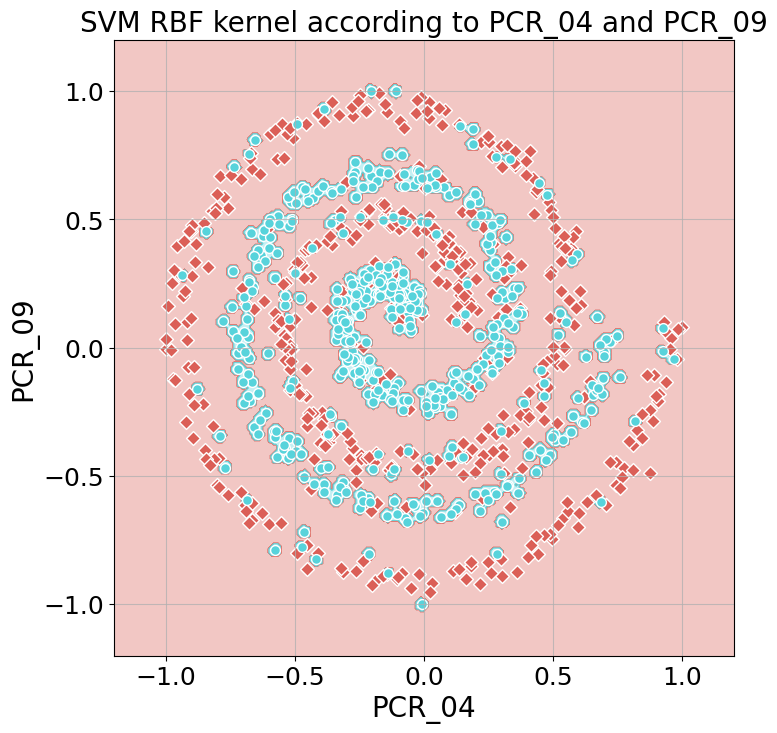

Train accuracy: 0.9800
Test accuracy: 0.6920


In [ ]:
# Q16 : applying dual SVM with RBF kernel with other parameters

dualSVM_ = SVC(gamma = 5000, C=1, kernel='rbf')
dualSVM_.fit(X_train_temp, y_train_temp)
visualize_clf(dualSVM_, X_train_temp, y_train_temp, "SVM RBF kernel according to PCR_04 and PCR_09", "PCR_04", "PCR_09")

# training and test accuracy
train_score = dualSVM_.score(X_train_temp,y_train_temp)
print(f"Train accuracy: {train_score:.4f}")
test_score = dualSVM_.score(X_test_temp,y_test_temp)
print(f"Test accuracy: {test_score:.4f}")